In [1]:
# Connect to Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unrar x "/content/drive/MyDrive/Crypro_21.rar" "content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/drive/MyDrive/Crypro_21.rar

Creating    content                                                   OK
Extracting  content/data_TSTUSDT.pkl                                       4%  OK 
Extracting  content/data_TRXUSDT.pkl                                       9%  OK 
Extracting  content/data_OGUSDT.pkl                                       13%  OK 
Extracting  content/data_XRPUSDT.pkl                                      19%  OK 
Extracting  content/data_FORMUSDT.pkl                                     23%  OK 
Extracting  content/data_USDCUSDT.pkl                                     27%  OK 
Extracting  content/data_BTCUSDT.pkl                                      34% 35%  OK 
Extracting  content/data_WUSDT.pkl                                        39%  OK 
Extracting  content/data_TUSDT.pkl                   

Loading Embeded news based on Finbert

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data_news_path = '../../../dataset/Crypto_1min/'
df_news = pd.read_pickle('/content/drive/MyDrive/news_20crypto_embed_finbert.pickle')

Embedding No News sentence for using in timestamp with no news

In [2]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load FinBERT model and tokenizer
model_name = "yiyanghkust/finbert-tone"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Your input news text
text = "No news."

# Tokenize and encode the text
inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)

# Get the model output
with torch.no_grad():
    outputs = model(**inputs)

# Use the [CLS] token embedding as sentence embedding
cls_embedding = outputs.last_hidden_state[:, 0, :]  # Shape: [1, 768]

# Convert to numpy array if needed
embedding_vector = cls_embedding.squeeze().numpy()

print("Embedding shape:", embedding_vector.shape)
# print("Embedding vector:", embedding_vector)
no_news_vector = list(embedding_vector)

Embedding shape: (768,)


Loading OHLCV of multi stocks

In [3]:
import os
data_crypto_path = '/content/content/'
list_crypto = [x[5:-4] for x in os.listdir(data_crypto_path) if 'data_' in x and 'FORMUSDT' not in x]
# list_crypto = list_crypto[4:10]

In [4]:
len(list_crypto)

20

In [5]:
list_crypto = ['BTCUSDT', 'ETHUSDT', 'XRPUSDT', 'TRXUSDT', 'SEIUSDT',
 'HBARUSDT', 'XLMUSDT', 'TIAUSDT', 'ARKUSDT', 'JSTUSDT']

In [6]:
list_data = []
shifted_window = 30
selected_f_asset = ['open', 'high', 'low', 'close', 'volume',
    'quoteAssetVolume', 'numberOfTrades', 'takerBuyBaseVol',
       'takerBuyQuoteVol']
selected_f_asset = ['close', 'volume', 'numberOfTrades', 'prev_return', 'prev_volatility', 'return', 'volatility']
selected_f_all = []
list_target = []

for symb in list_crypto:
  df = pd.read_pickle(data_crypto_path+'data_{}.pkl'.format(symb))
  print(symb, len(df))
  df['return'] = 100*((df['close'].shift(-1)/df['close'])-1)
  df['prev_return'] = 100*((df['close']/df['close'].shift(shifted_window))-1)
  df['volatility'] = 100*df['close'].rolling(shifted_window).std().shift(-shifted_window)
  df['prev_volatility'] = 100*df['close'].rolling(shifted_window).std()
  df = df[selected_f_asset].rename(columns={x:symb+'_'+x for x in selected_f_asset})
  selected_f_all.extend(list(df.columns))

  df[symb+'_return'] = df[symb+'_'+'return']
  df[symb+'_volatility'] = df[symb+'_'+'volatility']
  list_target.append(symb+'_return')
  list_target.append(symb+'_volatility')
  list_data.append(df.copy())

BTCUSDT 131041
ETHUSDT 131041
XRPUSDT 131041
TRXUSDT 131041
SEIUSDT 131041
HBARUSDT 131041
XLMUSDT 131041
TIAUSDT 131041
ARKUSDT 131041
JSTUSDT 131041


In [7]:
len(selected_f_all)

70

In [8]:
data = pd.concat(list_data,axis=1)
df = pd.read_pickle(data_crypto_path+'data_{}.pkl'.format('BTCUSDT'))
df['return'] = df['close'].pct_change()
data['dateTime'] = df['dateTime']
data['time'] = data['dateTime'].astype(str).copy()
data['return'] = df['close'].pct_change()
data

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_prev_return,BTCUSDT_prev_volatility,BTCUSDT_return,BTCUSDT_volatility,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,...,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_prev_return,JSTUSDT_prev_volatility,JSTUSDT_return,JSTUSDT_volatility,dateTime,time,return
0,91785.18,44.25582000,9784,NaN,NaN,0.057275,30532.801818,2522.98,1236.00450000,7010,...,0.03331,18269.00000000,13,NaN,NaN,0.030021,0.008186,2025-02-25 00:00:00,2025-02-25 00:00:00,NaN
1,91837.75,29.64367000,7048,NaN,NaN,0.134171,30363.719702,2525.15,609.72690000,4877,...,0.03332,2854.40000000,4,NaN,NaN,0.000000,0.007935,2025-02-25 00:01:00,2025-02-25 00:01:00,0.000573
2,91960.97,70.22032000,6386,NaN,NaN,-0.106784,29798.433752,2529.97,672.80150000,3844,...,0.03332,89531.30000000,8,NaN,NaN,0.030012,0.007655,2025-02-25 00:02:00,2025-02-25 00:02:00,0.001342
3,91862.77,50.83532000,4539,NaN,NaN,-0.209748,29594.091863,2525.85,595.41120000,3903,...,0.03333,328.80000000,1,NaN,NaN,-0.120012,0.007285,2025-02-25 00:03:00,2025-02-25 00:03:00,-0.001068
4,91670.09,62.93148000,11779,NaN,NaN,0.141704,29585.077527,2516.18,1280.56490000,9605,...,0.03329,18030.80000000,13,NaN,NaN,0.030039,0.007097,2025-02-25 00:04:00,2025-02-25 00:04:00,-0.002097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131036,109394.14,1.80238000,514,0.142651,7155.315753,0.013666,NaN,2562.98,50.44800000,421,...,0.03559,1595.40000000,2,0.140687,0.002047,0.000000,NaN,2025-05-26 23:56:00,2025-05-26 23:56:00,-0.000065
131037,109409.09,5.64688000,698,0.180025,6913.379611,0.007742,NaN,2563.49,77.09600000,508,...,0.03559,836.40000000,2,0.168871,0.001946,-0.028098,NaN,2025-05-26 23:57:00,2025-05-26 23:57:00,0.000137
131038,109417.56,0.52540000,224,0.187661,6626.350282,0.015747,NaN,2563.20,60.38830000,171,...,0.03558,1531.20000000,1,0.112549,0.001864,0.028106,NaN,2025-05-26 23:58:00,2025-05-26 23:58:00,0.000077
131039,109434.79,3.88664000,1349,0.197704,6365.351309,-0.038626,NaN,2563.70,99.02600000,711,...,0.03559,7002.90000000,5,0.168871,0.001714,-0.028098,NaN,2025-05-26 23:59:00,2025-05-26 23:59:00,0.000157


Preparing embedding of news (Handling multi news and no news)

In [9]:
data['day'] = data['dateTime'].apply(lambda x:str(x)[:10])
data[data['day']>='2025-05-10'].shape[0]/data.shape[0]

0.18681939240390413

In [10]:
import numpy as np
df_news['embedding'] = df_news['embedding'].apply(lambda x: np.array(x))

df_grouped = df_news[['time', 'embedding', 'count']].groupby('time')['embedding'].apply(
    lambda x: np.mean(np.stack(x.values), axis=0)
).reset_index()
data_all = data.merge(df_grouped, on='time', how='left')
data_all['embedding'] = data_all['embedding'].apply(
    lambda x: no_news_vector if x is np.nan or x is None else x
)

In [11]:
list_crypto_first = [x[:-4] for x in list_crypto]
list_crypto_first

['BTC', 'ETH', 'XRP', 'TRX', 'SEI', 'HBAR', 'XLM', 'TIA', 'ARK', 'JST']

In [12]:
data_all = data_all[data_all['time']>=df_news['time'].min()][data_all['time']<=df_news['time'].max()]

Showing Data

In [13]:
data_all[selected_f_all]

,BTCUSDT_close,BTCUSDT_volume,BTCUSDT_numberOfTrades,BTCUSDT_prev_return,BTCUSDT_prev_volatility,BTCUSDT_return,BTCUSDT_volatility,ETHUSDT_close,ETHUSDT_volume,ETHUSDT_numberOfTrades,...,ARKUSDT_prev_volatility,ARKUSDT_return,ARKUSDT_volatility,JSTUSDT_close,JSTUSDT_volume,JSTUSDT_numberOfTrades,JSTUSDT_prev_return,JSTUSDT_prev_volatility,JSTUSDT_return,JSTUSDT_volatility
0,91785.18,44.25582000,9784,NaN,NaN,0.057275,30532.801818,2522.98,1236.00450000,7010,...,NaN,0.164628,0.395882,0.03331,18269.00000000,13,NaN,NaN,0.030021,0.008186
1,91837.75,29.64367000,7048,NaN,NaN,0.134171,30363.719702,2525.15,609.72690000,4877,...,NaN,0.117398,0.394875,0.03332,2854.40000000,4,NaN,NaN,0.000000,0.007935
2,91960.97,70.22032000,6386,NaN,NaN,-0.106784,29798.433752,2529.97,672.80150000,3844,...,NaN,-0.070356,0.391564,0.03332,89531.30000000,8,NaN,NaN,0.030012,0.007655
3,91862.77,50.83532000,4539,NaN,NaN,-0.209748,29594.091863,2525.85,595.41120000,3903,...,NaN,-0.328561,0.388680,0.03333,328.80000000,1,NaN,NaN,-0.120012,0.007285
4,91670.09,62.93148000,11779,NaN,NaN,0.141704,29585.077527,2516.18,1280.56490000,9605,...,NaN,-0.070638,0.388194,0.03329,18030.80000000,13,NaN,NaN,0.030039,0.007097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129596,109030.02,21.06713000,3921,0.258126,11548.993178,-0.005164,3644.397554,2552.77,225.37620000,1890,...,0.046639,0.000000,0.142062,0.03616,738.40000000,2,0.388673,0.006327,0.000000,0.003212
129597,109024.39,5.10152000,1789,0.273262,12009.730552,-0.026086,5426.627618,2551.81,1078.91390000,2178,...,0.045151,0.000000,0.148774,0.03616,1093.20000000,3,0.416551,0.006199,0.027655,0.003812
129598,108995.95,7.48873000,769,0.367793,11563.053932,0.007560,6267.356571,2550.74,90.29550000,1032,...,0.040678,0.122519,0.150848,0.03617,1733.20000000,2,0.472222,0.005998,0.027647,0.004163
129599,109004.19,6.56241000,1298,0.332862,11303.698905,-0.043980,6550.656289,2551.22,90.74810000,584,...,0.039335,-0.220264,0.148169,0.03618,33108.70000000,15,0.500000,0.005770,-0.055279,0.004326


Normalizing Data Z-Score

In [14]:
##Normalization

for x in selected_f_all:
  data_all[x] = data_all[x].fillna(0)
  data_all[x] = data_all[x].astype(float)
  data_all[x] = (data_all[x]-data_all[x].mean())/(data_all[x].std())

Create time index for TimseNet

In [15]:
import warnings
warnings.filterwarnings('ignore')
from torch.utils.data import Dataset, DataLoader

df_stamp = data_all[['time']].rename(columns={'time':'dateTime'})
df_stamp['dateTime'] = pd.to_datetime(df_stamp['dateTime'])
df_stamp['month'] = df_stamp.dateTime.apply(lambda row: row.month, 1)
df_stamp['day'] = df_stamp.dateTime.apply(lambda row: row.day, 1)
df_stamp['weekday'] = df_stamp.dateTime.apply(lambda row: row.weekday(), 1)
df_stamp['hour'] = df_stamp.dateTime.apply(lambda row: row.hour, 1)
df_stamp['minute'] = df_stamp.dateTime.apply(lambda row: row.minute, 1)
data_stamp = df_stamp.drop(['dateTime'], axis=1)

Dataset Class and Creating DataLoader

In [16]:
selected_f_all = [x for x in selected_f_all if (('return' not in x) or ('prev_return' in x))]
selected_f_all = [x for x in selected_f_all if (('volatility' not in x) or ('prev_volatility' in x))]
selected_f_all

['BTCUSDT_close',
 'BTCUSDT_volume',
 'BTCUSDT_numberOfTrades',
 'BTCUSDT_prev_return',
 'BTCUSDT_prev_volatility',
 'ETHUSDT_close',
 'ETHUSDT_volume',
 'ETHUSDT_numberOfTrades',
 'ETHUSDT_prev_return',
 'ETHUSDT_prev_volatility',
 'XRPUSDT_close',
 'XRPUSDT_volume',
 'XRPUSDT_numberOfTrades',
 'XRPUSDT_prev_return',
 'XRPUSDT_prev_volatility',
 'TRXUSDT_close',
 'TRXUSDT_volume',
 'TRXUSDT_numberOfTrades',
 'TRXUSDT_prev_return',
 'TRXUSDT_prev_volatility',
 'SEIUSDT_close',
 'SEIUSDT_volume',
 'SEIUSDT_numberOfTrades',
 'SEIUSDT_prev_return',
 'SEIUSDT_prev_volatility',
 'HBARUSDT_close',
 'HBARUSDT_volume',
 'HBARUSDT_numberOfTrades',
 'HBARUSDT_prev_return',
 'HBARUSDT_prev_volatility',
 'XLMUSDT_close',
 'XLMUSDT_volume',
 'XLMUSDT_numberOfTrades',
 'XLMUSDT_prev_return',
 'XLMUSDT_prev_volatility',
 'TIAUSDT_close',
 'TIAUSDT_volume',
 'TIAUSDT_numberOfTrades',
 'TIAUSDT_prev_return',
 'TIAUSDT_prev_volatility',
 'ARKUSDT_close',
 'ARKUSDT_volume',
 'ARKUSDT_numberOfTrades',
 'A

In [18]:
import torch
from torch.utils.data import Dataset
import numpy as np
from torch.utils.data import Dataset, DataLoader

class NewsTimeSeriesDataset(Dataset):
    def __init__(self, df, data_stamp, selected_f_all, stock_list, seq_len=30):
        self.df = df.reset_index(drop=True)
        self.data_stamp = data_stamp.reset_index(drop=True)
        self.features = selected_f_all
        self.seq_len = seq_len
        self.stock_list = [x+'_return' for x in stock_list]

    def __len__(self):
        return len(self.df) - self.seq_len-shifted_window

    def __getitem__(self, idx):
        ts_window = self.df.loc[idx:idx + self.seq_len - 1, self.features].values.astype('float32')
        # x_mask = self.data_stamp.loc[idx:idx + self.seq_len - 1].values.astype('float32')
        news_window = self.df.loc[idx:idx + self.seq_len - 1, 'embedding'].values
        news_window = np.stack(news_window).astype('float32')
        target = self.df.loc[idx + self.seq_len:idx + self.seq_len+shifted_window-1, self.stock_list].values.astype('float32')  # shape: [19]
        return {
            'timeseries': torch.tensor(ts_window),     # [30, 114]
            'news': torch.tensor(news_window),         # [30, 768]
            'target': torch.tensor(target)
            # 'time_mask':torch.tensor(x_mask)# [19]
        }


split = int(0.8 * len(data_all))

data_train = data_all[data_all['day']<'2025-05-10'].copy()
data_test = data_all[data_all['day']>='2025-05-10'].copy()
train_dataset = NewsTimeSeriesDataset(data_train, data_stamp.iloc[:split], selected_f_all, list_crypto, seq_len=shifted_window)
val_dataset = NewsTimeSeriesDataset(data_test, data_stamp.iloc[split:], selected_f_all, list_crypto, seq_len=shifted_window)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


Loss Function

In [19]:
def func_loss(output, target, top_k=7):# Step 1: Normalize weights
  weights = torch.tanh(output)
  weights = weights / (torch.sum(torch.abs(weights), dim=1, keepdim=True) + 1e-8)

  # Step 2: Compute portfolio return sequence
  weights_exp = weights.unsqueeze(1)  # [B, 1, N]
  # print((weights_exp * target).shape)
  portfolio_returns = torch.sum(weights_exp * target, dim=2)  # [B, T]

  # Step 3: Sharpe ratio
  mean_r = torch.mean(portfolio_returns, dim=1)
  std_r = torch.std(portfolio_returns, dim=1) + 1e-6
  sharpe = mean_r / std_r
  loss_sharpe = -torch.mean(sharpe)

  # Step 4: Diversification penalty
  loss_diversify = torch.mean(weights ** 2)  # Encourage distributed weights

  # Step 5: Total loss
  λ_div = 0.01
  loss = loss_sharpe + λ_div * loss_diversify
  return loss



Model Architecture

In [20]:
import math
import torch.nn as nn
import torch

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=500):
        super().__init__()
        pe = torch.zeros(max_len, d_model)  # [max_len, d_model]
        position = torch.arange(0, max_len, dtype=torch.float32).unsqueeze(1)  # [max_len, 1]
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))  # [d_model/2]

        pe[:, 0::2] = torch.sin(position * div_term)  # even dims
        pe[:, 1::2] = torch.cos(position * div_term)  # odd dims
        pe = pe.unsqueeze(0)  # [1, max_len, d_model]
        self.register_buffer('pe', pe)

    def forward(self, x):
        # x: [batch_size, seq_len, d_model]
        x = x + self.pe[:, :x.size(1), :]
        return x

class TransformerReturnPredictor(nn.Module):
    def __init__(self, feature_dim, d_model=64, nhead=4, num_layers=2, max_len=500):
        super().__init__()
        self.input_proj = nn.Linear(feature_dim, d_model)
        self.pos_encoder = PositionalEncoding(d_model, max_len=max_len)

        encoder_layer = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.output_layer = nn.Linear(d_model, 1)

    def forward(self, x):
        # x: [batch_size, seq_len, feature_dim]
        x = self.input_proj(x)             # [batch_size, seq_len, d_model]
        x = self.pos_encoder(x)            # Add positional encoding
        x = self.transformer(x)            # [batch_size, seq_len, d_model]
        x = x[:, -1, :]                    # Use representation of last time step
        return self.output_layer(x).squeeze(-1)


In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.fft
from transformers import AutoTokenizer, AutoModel
finbert_model_name = "yiyanghkust/finbert-tone"
import torch.nn as nn

class MarketNewsFusionModel(nn.Module):
    def __init__(self, ts_input_dim, news_embed_dim, hidden_dim=64, num_stocks=19,
                 max_len=30, d_model=64, nhead=4, num_layers=2):
        super().__init__()
        self.num_stocks = num_stocks

        self.d_model = d_model
        self.input_proj = nn.Linear(ts_input_dim, self.d_model)
        self.pos_encoder = PositionalEncoding(self.d_model, max_len=max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=self.d_model, nhead=nhead, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.ts_out = nn.Linear(128, hidden_dim)

        # 2. News LSTM
        self.news_proj = nn.Linear(news_embed_dim, 64)
        self.news_lstm = nn.LSTM(input_size=64, hidden_size=hidden_dim, batch_first=True)

        # 3. Stock-specific regression heads (1 per stock)
        self.stock_heads = nn.Sequential(
                nn.Linear(self.d_model+hidden_dim, 64),
                nn.ReLU(),
                nn.Linear(64, num_stocks)
            )

    def forward(self, ts_input, x_mark_enc, news_input):  # [B, 30, F], [B, 30, E]

                # Transformer on OHLCV
        x = self.input_proj(ts_input)           # [B, T, d_model]
        x = self.pos_encoder(x)
        x = self.transformer(x)                  # [B, T, d_model]
        ts_emb = x[:, -1, :].squeeze(1)                   # [B, d_model]


        news_proj = self.news_proj(news_input)         # [B, 30, 64]
        _, (hn, _) = self.news_lstm(news_proj)        # hn: [1, B, 64]
        news_emb = hn[-1]                              # [B, 64]

        fused = torch.cat([ts_emb, news_emb], dim=1)   # [B, 128]

        outputs = self.stock_heads(fused).squeeze(-1)
        return outputs             # [B, 19]


seq_len = shifted_window

# model = TimesNet.Model(args).float()
# model = Model_TimesNet(configs).float()

In [22]:
data_all = data_all.fillna(0)

In [23]:
seq_len

30

Loading Model and dataloader

In [24]:
from torch.utils.data import DataLoader

# Example setup
# selected_f_all = list of feature columns (e.g., 6 × 19 = 114)
# stock_list = ['AAPL', 'GOOG', ..., 'TSLA'] → 19 stock target columns
# df = your dataframe with those columns and 'embedding' column


split = int(0.8 * len(data_all))

# train_dataset = NewsTimeSeriesDataset(data_all.iloc[:split], data_stamp.iloc[:split], selected_f_all, list_crypto, seq_len=30)
# val_dataset = NewsTimeSeriesDataset(data_all.iloc[split:], data_stamp.iloc[split:], selected_f_all, list_crypto, seq_len=30)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# val_loader = DataLoader(val_dataset, batch_size=32)
data_train = data_all[data_all['day']<'2025-05-10'].copy()
data_test = data_all[data_all['day']>='2025-05-10'].copy()
train_dataset = NewsTimeSeriesDataset(data_train, data_stamp.iloc[:split], selected_f_all, list_crypto, seq_len=shifted_window)
val_dataset = NewsTimeSeriesDataset(data_test, data_stamp.iloc[split:], selected_f_all, list_crypto, seq_len=shifted_window)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)


model = MarketNewsFusionModel(ts_input_dim=len(selected_f_all),
 news_embed_dim=len(data_all['embedding'].iloc[0]),
 hidden_dim=64,
 num_stocks=len(list_crypto),
 max_len=shifted_window,
 d_model=64, nhead=4, num_layers=2).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()



Testing model pipeline

In [30]:
# One training step
for batch in val_loader:
    ts_input = batch['timeseries'].cuda()
    news_input = batch['news'].cuda()
    target = batch['target'].cuda()
    # time_mask = batch['time_mask'].cuda()
    time_mask = 1
    output = model(ts_input, time_mask, news_input)  # [B, 19]
    loss = func_loss(output, target)
    break

Validation Function and Portfolio Creator

In [ ]:
import matplotlib.pyplot as plt

def func_validation(output, target, top_k=7):# Step 1: Normalize weights
  weights = torch.tanh(output)
  weights = weights / (torch.sum(torch.abs(weights), dim=1, keepdim=True) + 1e-8)

  # Step 2: Compute portfolio return sequence
  weights_exp = weights.unsqueeze(1)  # [B, 1, N]
  # print((weights_exp * target).shape)
  portfolio_returns = torch.sum(weights_exp * target, dim=2)  # [B, T]

  # Step 3: Sharpe ratio
  mean_r = torch.mean(portfolio_returns, dim=1)
  std_r = torch.std(portfolio_returns, dim=1) + 1e-6
  sharpe = mean_r / std_r
  return mean_r, sharpe




def func_generate_portfolio(all_preds):

  only_top_k = True
  # len(self.df) - self.seq_len-shifted_window
  predicted_array = np.vstack(all_preds)

  df_weight_pred = data_test[shifted_window:-shifted_window][['dateTime']+[x+'_return' for x in list_crypto]].copy()

  df_return = data_test[shifted_window:-shifted_window][['dateTime']+[x+'_return' for x in list_crypto]].copy()
  list_weight = []
  for i in range(len(list_crypto)):
    df_weight_pred[list_crypto[i]+'_weight'] = predicted_array[:,i]
    list_weight.append(list_crypto[i]+'_weight')

  sum_weight = abs(df_weight_pred[list_weight]).sum(axis=1).copy()
  for x in list_weight:
    df_weight_pred[x] = df_weight_pred[x]/sum_weight

  df_weight_pred.to_pickle('/content/drive/MyDrive/Portfolio/20of20_30min_stock_df_weight_pred_epoch{}.pickle'.format(str(epoch)))

  df_weight_30 = df_weight_pred[['dateTime']+list(df_weight_pred.columns[-len(list_weight):])].iloc[::shifted_window].reset_index().drop('index',axis=1)
  df_portfolio = df_return.merge(df_weight_30, on='dateTime', how='left')
  df_portfolio = df_portfolio.fillna(method='ffill')
  list_portfolio = []
  for x in list_crypto:
    df_portfolio[x+'_value'] = df_portfolio[x+'_weight']*df_portfolio[x+'_return']
    list_portfolio.append(x+'_value')
  df_portfolio['portfolio'] = df_portfolio[list_portfolio].cumsum().sum(axis=1)
  df_portfolio.to_pickle('/content/drive/MyDrive/Portfolio/20of20_30min_stock_df_portfolio_epoch{}.pickle'.format(str(epoch)))

  # Example: Plot df['y'] vs df['x']
  plt.figure(figsize=(10, 5))  # Optional: adjust figure size

  plt.plot(df_portfolio['dateTime'], df_portfolio['portfolio'])  # You can remove `marker` if not needed

  # Add grid
  plt.grid(True)

  # Rotate x-axis labels
  plt.xticks(rotation=45)

  # Optional: Add labels and title
  plt.xlabel('X-axis')
  plt.ylabel('Y-axis')
  plt.title('portfolio cum return')

  plt.tight_layout()  # Adjust layout to prevent clipping of labels
  plt.savefig('/content/drive/MyDrive/Portfolio/20of20_30min_stock_df_portfolio_epoch{}.png'.format(str(epoch)), dpi=300)  # or .jpg, .svg, .pdf

  plt.show()



Training model

In [34]:
# One training step
for batch in train_loader:
    ts_input = batch['timeseries'].cuda()
    news_input = batch['news'].cuda()
    target = batch['target'].cuda()
    # time_mask = batch['time_mask'].cuda()
    time_mask = 1
    output = model(ts_input, time_mask, news_input)  # [B, 19]
    loss = func_loss(output, target)
    mean_r, sharp = func_validation(output, target)
    break


🔁 Epoch 1/50


Training:   0%|          | 1/3329 [00:00<40:09,  1.38it/s]

  Step 0/3329 - Batch Loss: -0.0330 - Avg Loss: -0.0330


Training:   3%|▎         | 101/3329 [00:54<28:42,  1.87it/s]

  Step 100/3329 - Batch Loss: 0.0098 - Avg Loss: -0.0073


Training:   6%|▌         | 201/3329 [01:48<28:00,  1.86it/s]

  Step 200/3329 - Batch Loss: -0.0263 - Avg Loss: -0.0065


Training:   9%|▉         | 301/3329 [02:41<26:59,  1.87it/s]

  Step 300/3329 - Batch Loss: 0.0024 - Avg Loss: -0.0105


Training:  12%|█▏        | 401/3329 [03:35<26:22,  1.85it/s]

  Step 400/3329 - Batch Loss: -0.0459 - Avg Loss: -0.0131


Training:  15%|█▌        | 501/3329 [04:28<25:02,  1.88it/s]

  Step 500/3329 - Batch Loss: -0.0425 - Avg Loss: -0.0142


Training:  18%|█▊        | 601/3329 [05:22<24:14,  1.88it/s]

  Step 600/3329 - Batch Loss: -0.1037 - Avg Loss: -0.0157


Training:  21%|██        | 701/3329 [06:16<23:26,  1.87it/s]

  Step 700/3329 - Batch Loss: 0.0157 - Avg Loss: -0.0162


Training:  24%|██▍       | 801/3329 [07:10<22:25,  1.88it/s]

  Step 800/3329 - Batch Loss: 0.0038 - Avg Loss: -0.0165


Training:  27%|██▋       | 901/3329 [08:03<21:56,  1.84it/s]

  Step 900/3329 - Batch Loss: -0.0658 - Avg Loss: -0.0176


Training:  30%|███       | 1001/3329 [08:57<20:49,  1.86it/s]

  Step 1000/3329 - Batch Loss: -0.0324 - Avg Loss: -0.0193


Training:  33%|███▎      | 1101/3329 [09:50<19:58,  1.86it/s]

  Step 1100/3329 - Batch Loss: -0.0372 - Avg Loss: -0.0206


Training:  36%|███▌      | 1201/3329 [10:44<18:43,  1.89it/s]

  Step 1200/3329 - Batch Loss: -0.0295 - Avg Loss: -0.0215


Training:  39%|███▉      | 1301/3329 [11:37<18:00,  1.88it/s]

  Step 1300/3329 - Batch Loss: -0.0975 - Avg Loss: -0.0228


Training:  42%|████▏     | 1401/3329 [12:31<17:16,  1.86it/s]

  Step 1400/3329 - Batch Loss: -0.0715 - Avg Loss: -0.0237


Training:  45%|████▌     | 1501/3329 [13:24<16:17,  1.87it/s]

  Step 1500/3329 - Batch Loss: -0.0432 - Avg Loss: -0.0248


Training:  48%|████▊     | 1601/3329 [14:17<15:32,  1.85it/s]

  Step 1600/3329 - Batch Loss: -0.0435 - Avg Loss: -0.0259


Training:  51%|█████     | 1701/3329 [15:11<14:22,  1.89it/s]

  Step 1700/3329 - Batch Loss: 0.0082 - Avg Loss: -0.0269


Training:  54%|█████▍    | 1801/3329 [16:04<13:30,  1.88it/s]

  Step 1800/3329 - Batch Loss: -0.0330 - Avg Loss: -0.0275


Training:  57%|█████▋    | 1901/3329 [16:57<12:35,  1.89it/s]

  Step 1900/3329 - Batch Loss: -0.0545 - Avg Loss: -0.0285


Training:  60%|██████    | 2001/3329 [17:51<11:55,  1.86it/s]

  Step 2000/3329 - Batch Loss: 0.0206 - Avg Loss: -0.0293


Training:  63%|██████▎   | 2101/3329 [18:44<10:54,  1.88it/s]

  Step 2100/3329 - Batch Loss: -0.0759 - Avg Loss: -0.0306


Training:  66%|██████▌   | 2201/3329 [19:37<10:12,  1.84it/s]

  Step 2200/3329 - Batch Loss: -0.0265 - Avg Loss: -0.0312


Training:  69%|██████▉   | 2301/3329 [20:31<09:07,  1.88it/s]

  Step 2300/3329 - Batch Loss: -0.0408 - Avg Loss: -0.0317


Training:  72%|███████▏  | 2401/3329 [21:24<08:17,  1.87it/s]

  Step 2400/3329 - Batch Loss: -0.0154 - Avg Loss: -0.0326


Training:  75%|███████▌  | 2501/3329 [22:17<07:19,  1.89it/s]

  Step 2500/3329 - Batch Loss: -0.0499 - Avg Loss: -0.0335


Training:  78%|███████▊  | 2601/3329 [23:11<06:28,  1.87it/s]

  Step 2600/3329 - Batch Loss: -0.0555 - Avg Loss: -0.0342


Training:  81%|████████  | 2701/3329 [24:04<05:34,  1.88it/s]

  Step 2700/3329 - Batch Loss: -0.0499 - Avg Loss: -0.0352


Training:  84%|████████▍ | 2801/3329 [24:58<04:44,  1.86it/s]

  Step 2800/3329 - Batch Loss: 0.0077 - Avg Loss: -0.0360


Training:  87%|████████▋ | 2901/3329 [25:51<03:49,  1.87it/s]

  Step 2900/3329 - Batch Loss: -0.1139 - Avg Loss: -0.0367


Training:  90%|█████████ | 3001/3329 [26:45<02:55,  1.86it/s]

  Step 3000/3329 - Batch Loss: -0.0567 - Avg Loss: -0.0376


Training:  93%|█████████▎| 3101/3329 [27:39<02:01,  1.87it/s]

  Step 3100/3329 - Batch Loss: -0.1081 - Avg Loss: -0.0383


Training:  96%|█████████▌| 3201/3329 [28:32<01:07,  1.88it/s]

  Step 3200/3329 - Batch Loss: -0.0863 - Avg Loss: -0.0392


Training:  99%|█████████▉| 3301/3329 [29:26<00:15,  1.85it/s]

  Step 3300/3329 - Batch Loss: -0.0910 - Avg Loss: -0.0399


Validating: 100%|██████████| 719/719 [01:30<00:00,  7.95it/s]


📊 Epoch 1 Summary:
  Train Loss: -0.0401
  Val Loss: -0.0117
Mean Return  89.4512 0.050729796 0.6182812 -0.39088786
Sharpe  0.012911342 0.16645724 0.78109246 -0.7461602
Winrate 0.5291762760541316


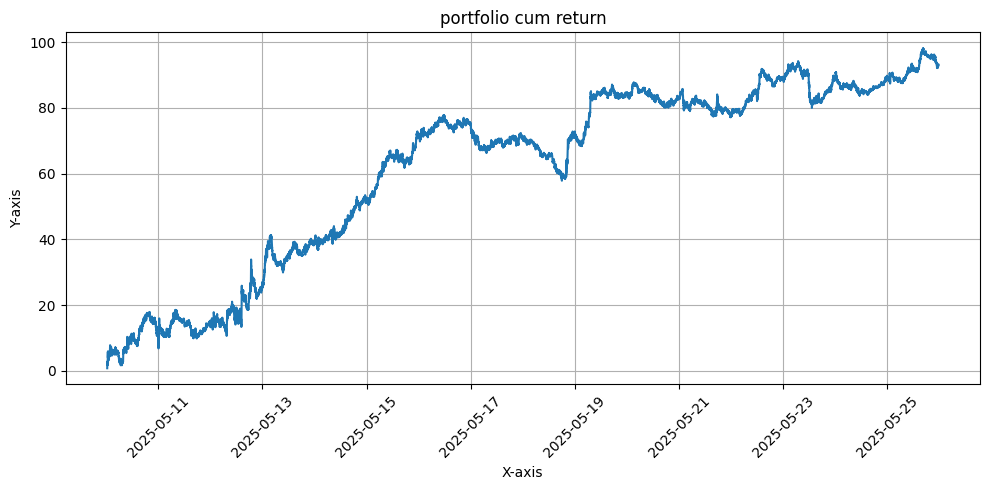

✅ Best model saved.

🔁 Epoch 2/50


Training:   0%|          | 1/3329 [00:00<31:26,  1.76it/s]

  Step 0/3329 - Batch Loss: -0.1105 - Avg Loss: -0.1105


Training:   3%|▎         | 101/3329 [00:56<30:23,  1.77it/s]

  Step 100/3329 - Batch Loss: -0.0259 - Avg Loss: -0.0654


Training:   6%|▌         | 201/3329 [01:53<29:24,  1.77it/s]

  Step 200/3329 - Batch Loss: -0.0881 - Avg Loss: -0.0675


Training:   9%|▉         | 301/3329 [02:49<28:30,  1.77it/s]

  Step 300/3329 - Batch Loss: -0.0256 - Avg Loss: -0.0665


Training:  12%|█▏        | 401/3329 [03:46<27:40,  1.76it/s]

  Step 400/3329 - Batch Loss: -0.0398 - Avg Loss: -0.0676


Training:  15%|█▌        | 501/3329 [04:43<26:39,  1.77it/s]

  Step 500/3329 - Batch Loss: -0.0599 - Avg Loss: -0.0691


Training:  18%|█▊        | 601/3329 [05:39<25:45,  1.77it/s]

  Step 600/3329 - Batch Loss: -0.0737 - Avg Loss: -0.0699


Training:  21%|██        | 701/3329 [06:36<24:52,  1.76it/s]

  Step 700/3329 - Batch Loss: -0.0632 - Avg Loss: -0.0712


Training:  24%|██▍       | 801/3329 [07:33<23:49,  1.77it/s]

  Step 800/3329 - Batch Loss: -0.0428 - Avg Loss: -0.0719


Training:  27%|██▋       | 901/3329 [08:29<22:52,  1.77it/s]

  Step 900/3329 - Batch Loss: -0.0770 - Avg Loss: -0.0725


Training:  30%|███       | 1001/3329 [09:26<21:59,  1.76it/s]

  Step 1000/3329 - Batch Loss: -0.0757 - Avg Loss: -0.0730


Training:  33%|███▎      | 1101/3329 [10:22<21:00,  1.77it/s]

  Step 1100/3329 - Batch Loss: -0.0953 - Avg Loss: -0.0736


Training:  36%|███▌      | 1201/3329 [11:19<19:55,  1.78it/s]

  Step 1200/3329 - Batch Loss: -0.0596 - Avg Loss: -0.0741


Training:  39%|███▉      | 1301/3329 [12:15<19:01,  1.78it/s]

  Step 1300/3329 - Batch Loss: -0.1125 - Avg Loss: -0.0748


Training:  42%|████▏     | 1401/3329 [13:12<18:20,  1.75it/s]

  Step 1400/3329 - Batch Loss: -0.0957 - Avg Loss: -0.0754


Training:  45%|████▌     | 1501/3329 [14:08<17:12,  1.77it/s]

  Step 1500/3329 - Batch Loss: -0.0420 - Avg Loss: -0.0757


Training:  48%|████▊     | 1601/3329 [15:05<16:12,  1.78it/s]

  Step 1600/3329 - Batch Loss: -0.1105 - Avg Loss: -0.0765


Training:  51%|█████     | 1701/3329 [16:01<15:27,  1.76it/s]

  Step 1700/3329 - Batch Loss: -0.1420 - Avg Loss: -0.0772


Training:  54%|█████▍    | 1801/3329 [16:58<14:12,  1.79it/s]

  Step 1800/3329 - Batch Loss: -0.1238 - Avg Loss: -0.0778


Training:  57%|█████▋    | 1901/3329 [17:54<13:39,  1.74it/s]

  Step 1900/3329 - Batch Loss: -0.0400 - Avg Loss: -0.0780


Training:  60%|██████    | 2001/3329 [18:51<12:27,  1.78it/s]

  Step 2000/3329 - Batch Loss: -0.0573 - Avg Loss: -0.0785


Training:  63%|██████▎   | 2101/3329 [19:47<11:29,  1.78it/s]

  Step 2100/3329 - Batch Loss: -0.1066 - Avg Loss: -0.0791


Training:  66%|██████▌   | 2201/3329 [20:43<10:45,  1.75it/s]

  Step 2200/3329 - Batch Loss: -0.0724 - Avg Loss: -0.0797


Training:  69%|██████▉   | 2301/3329 [21:39<09:34,  1.79it/s]

  Step 2300/3329 - Batch Loss: -0.1127 - Avg Loss: -0.0802


Training:  72%|███████▏  | 2401/3329 [22:36<08:46,  1.76it/s]

  Step 2400/3329 - Batch Loss: -0.1159 - Avg Loss: -0.0809


Training:  75%|███████▌  | 2501/3329 [23:32<07:45,  1.78it/s]

  Step 2500/3329 - Batch Loss: -0.1007 - Avg Loss: -0.0814


Training:  78%|███████▊  | 2601/3329 [24:29<06:50,  1.78it/s]

  Step 2600/3329 - Batch Loss: -0.0176 - Avg Loss: -0.0819


Training:  81%|████████  | 2701/3329 [25:25<05:51,  1.79it/s]

  Step 2700/3329 - Batch Loss: -0.0693 - Avg Loss: -0.0824


Training:  84%|████████▍ | 2801/3329 [26:21<04:56,  1.78it/s]

  Step 2800/3329 - Batch Loss: -0.1194 - Avg Loss: -0.0831


Training:  87%|████████▋ | 2901/3329 [27:18<04:02,  1.76it/s]

  Step 2900/3329 - Batch Loss: -0.1235 - Avg Loss: -0.0837


Training:  90%|████████▉ | 2983/3329 [28:05<03:16,  1.76it/s]

In [ ]:
from sklearn.metrics import r2_score
from tqdm import tqdm
import torch
import numpy as np
import os

def compute_r2_per_stock(y_true, y_pred):
    r2s = []
    for i in range(y_true.shape[1]):
        r2s.append(r2_score(y_true[:, i], y_pred[:, i]))
    return r2s

num_epochs=50
patience=5
save_path='/content/drive/MyDrive/Portfolio/best_model_20of20_v2_30min.pth'
device='cuda'

best_val_loss = float('inf')
patience_counter = 0

model = MarketNewsFusionModel(ts_input_dim=len(selected_f_all),
 news_embed_dim=len(data_all['embedding'].iloc[0]),
 hidden_dim=64,
 num_stocks=len(list_crypto),
 max_len=shifted_window,
 d_model=64, nhead=4, num_layers=2).cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
loss_fn = nn.MSELoss()

model.to(device)

for epoch in range(1, num_epochs + 1):
    model.train()
    total_train_loss = 0

    print(f"\n🔁 Epoch {epoch}/{num_epochs}")
    for step, batch in enumerate(tqdm(train_loader, desc="Training")):
        ts_input = batch['timeseries'].to(device)
        news_input = batch['news'].to(device)
        target = batch['target'].to(device)
        time_mask = 1 #batch['time_mask'].to(device)

        output = model(ts_input, time_mask, news_input)
        loss = func_loss(output, target)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Step-wise print every 100 steps
        if step % 100 == 0:
            avg_loss = total_train_loss / (step + 1)
            print(f"  Step {step}/{len(train_loader)} - Batch Loss: {loss.item():.4f} - Avg Loss: {avg_loss:.4f}")


    # Validation phase
    model.eval()
    total_val_loss = 0
    all_preds, all_targets = [], []
    all_return, all_sharp = [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Validating"):
            ts_input = batch['timeseries'].to(device)
            news_input = batch['news'].to(device)
            target = batch['target'].to(device)
            time_mask = 1 #batch['time_mask'].to(device)

            output = model(ts_input, time_mask, news_input)
            loss = func_loss(output, target)
            mean_r, sharp = func_validation(output, target)
            total_val_loss += loss.item()
            output = torch.tanh(output)
            all_preds.append(output.cpu().numpy())
            all_targets.append(target.cpu().numpy())
            all_return.extend(mean_r.cpu().numpy())
            all_sharp.extend(sharp.cpu().numpy())

    avg_train_loss = total_train_loss / len(train_loader)
    avg_val_loss = total_val_loss / len(val_loader)

    # y_pred = np.concatenate(all_preds, axis=0)
    # y_true = np.concatenate(all_targets, axis=0)
    # r2_scores = compute_r2_per_stock(y_true, y_pred)

    print(f"📊 Epoch {epoch} Summary:")
    print(f"  Train Loss: {avg_train_loss:.4f}")
    print(f"  Val Loss: {avg_val_loss:.4f}")
    print("Mean Return ", np.sum(all_return), np.std(all_return), np.max(all_return), np.min(all_return))
    print("Sharpe ", np.mean(all_sharp), np.std(all_sharp), np.max(all_sharp), np.min(all_sharp))
    print('Winrate', sum([1 for x in all_return if x>0])/len(all_return))
    # print("  R² per stock:", ["{} , {:.3f}".format(list_crypto_first[r], r2_scores[r]) for r in range(len(r2_scores))])

    func_generate_portfolio(all_preds)
    # if epoch % 5 == 0:
    #     np.save(f"y_pred_epoch_{epoch}.npy", y_pred)
    #     np.save(f"y_true_epoch_{epoch}.npy", y_true)

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        patience_counter = 0
        torch.save(model.state_dict(), save_path)
        print("✅ Best model saved.")
    else:
        patience_counter += 1
        print(f"⏳ Early stopping patience: {patience_counter}/{patience}")

    if patience_counter >= patience:
        print("⛔ Early stopping triggered.")
        break
